In [40]:
import pandas as pd
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import contextily as ctx
import matplotlib.colors as mcolors
import numpy as np
import holoviews as hv
from holoviews import dim, opts


#xi number of cahrging stations ti install on piint i

excel_data_df = pd.read_excel('Demand_data.xlsx')
excel_data_df=excel_data_df.dropna()

final_results = pd.read_csv(r'C:\Users\Oleguer Simon\OneDrive - University of Edinburgh\S1.3. Methodology, Modelling and Consulting Skills\Group project\MMCS_project\Chargerss.csv')
final_results

final_results=final_results.set_index('Ref')
excel_data_df=excel_data_df.set_index('Ref')

# final_df=pd.merge(excel_data_df, final_results, left_index=True, right_index=True)
# final_df

final_df=pd.concat([excel_data_df, final_results], axis=1)

________________________________________________

In [41]:
final_df['geometry'] = gpd.GeoSeries.from_wkt(final_df['geometry'])
gdf = gpd.GeoDataFrame(final_df, geometry='geometry', crs = 'EPSG:4326')

gdf['geometry'] = gdf['geometry'].centroid


C:\Users\OLEGUE~1\AppData\Local\Temp/ipykernel_5480/3351199580.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'] = gdf['geometry'].centroid


In [42]:
gdf['Rapid_year1'].replace(to_replace = 0, value = np.nan, inplace=True)

for x in range(20):
    gdf['Rapid_year1'].replace(to_replace = x, value = 10, inplace=True)


gdf['Fast_year1'].replace(to_replace = 0, value = np.nan, inplace=True)

for x in range(20):
    gdf['Fast_year1'].replace(to_replace = x, value = 10, inplace=True)

gdf['Slow_year1'].replace(to_replace = 0, value = np.nan, inplace=True)

for x in range(20):
    gdf['Slow_year1'].replace(to_replace = x, value = 5, inplace=True)

In [32]:
gdf.columns

Index(['geometry', 'Number of Charging Points',
       'Number of Slow Charging Points', 'Number of Fast Charging Points',
       'Number of Rapid Charging Points', 'Number of PoI',
       'Number of Potential Locations', 'Distance from Centre', 'NEIGHBORS',
       'Demand_0', 'Demand_1', 'Demand_2', 'Demand_3', 'x', 'y',
       'Demand_0 (Full Electric)', 'Demand_0 (PHEV)',
       'Demand_1 (Full Electric)', 'Demand_1 (PHEV)',
       'Demand_2 (Full Electric)', 'Demand_2 (PHEV)',
       'Demand_3 (Full Electric)', 'Demand_3 (PHEV)', 'Slow_year1',
       'Fast_year1', 'Rapid_year1', 'Slow_year2', 'Fast_year2', 'Rapid_year2',
       'Slow_year3', 'Fast_year3', 'Rapid_year3', 'Slow_year4', 'Fast_year4',
       'Rapid_year4'],
      dtype='object')

In [43]:
#Slow_year1
gdf.iloc[0,23]=0
#Fast_year1
gdf.iloc[0,24]=0
#Rapid_year1
gdf.iloc[0,25]=0

In [44]:
#To create custom colours, but not even necessary
from matplotlib.colors import LinearSegmentedColormap
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(1,1,1,0), (0,0,0,1)]
cm = LinearSegmentedColormap.from_list('custom', colors, N=256, gamma=0)

(331403.6976170438, 348797.77845774335, 728414.0409797253, 734411.9998767556)

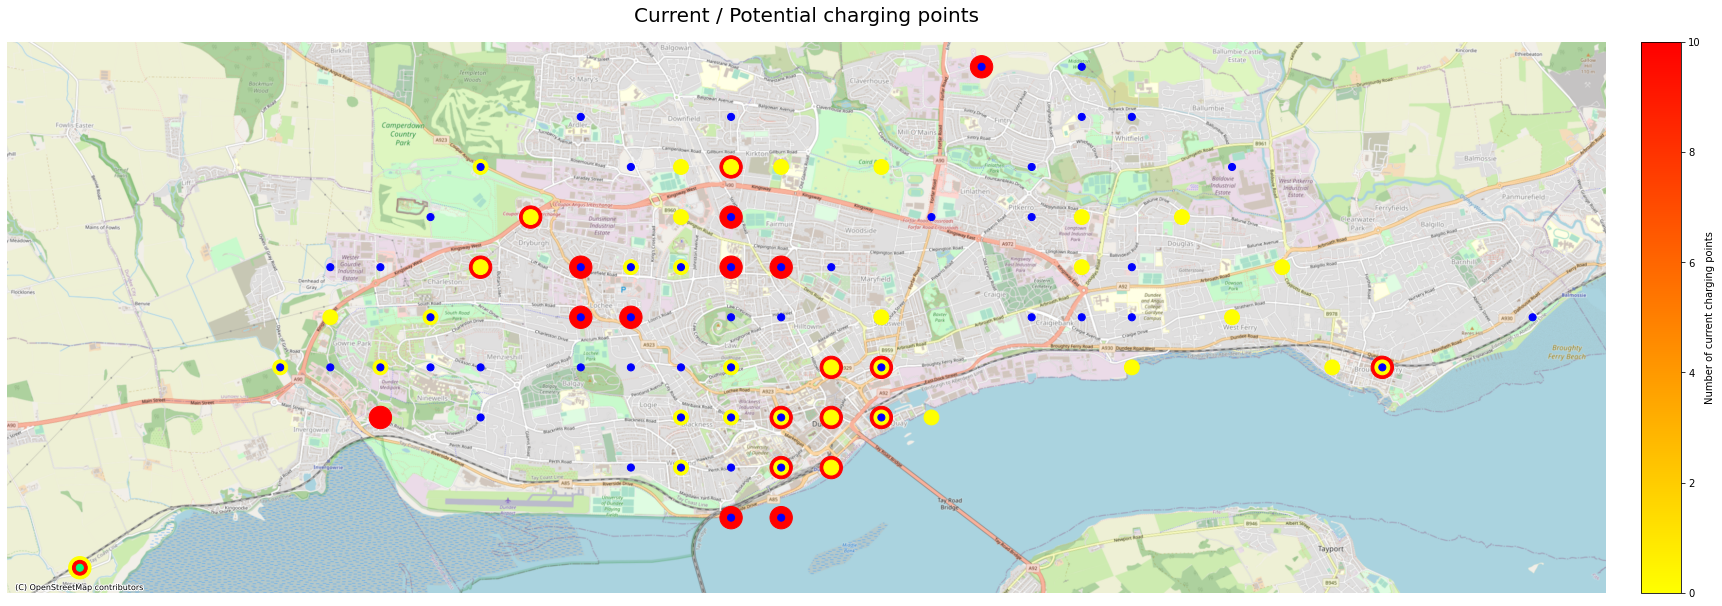

In [68]:
#centroids_df.plot(marker='*', color='green', markersize=5);
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(30,20))


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.5)


gdf = gdf.to_crs('EPSG:27700')
gdf.plot(column='Rapid_year1', cmap='autumn_r', legend=True, alpha=1 , markersize=500, marker='o', ax=ax, cax=cax, zorder=1, legend_kwds={'label': "Number of current charging points"})
#fig, axs = plt.c(2, 2)

gdf.plot(column='Slow_year1', cmap='winter_r', legend=False, alpha=1, markersize=50, marker='o', ax=ax, cax=cax, zorder=3)


gdf.plot(column='Fast_year1', cmap='autumn', legend=False, alpha=1, markersize=220, marker='o', ax=ax, cax=cax, zorder=2)


ax.axis('off')

ax.set_title('Current / Potential charging points', fontsize=20, pad=20)



ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')
ax.axis('off')

In [ ]:
fig, axs = plt.subplots(2, 2)
axes = gdf.plot(figsize=(30,20), column='Demand_3', cmap=cm, legend=False, alpha=0.5)

#fig, axs = plt.c(2, 2)

ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:4326')
axes.axis('off')

In [78]:
labels= excel_data_df['Demand_0'].values
labels

labels_reshaped=np.reshape(labels, (31, 14)) 
labels_reshaped

array([[    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      

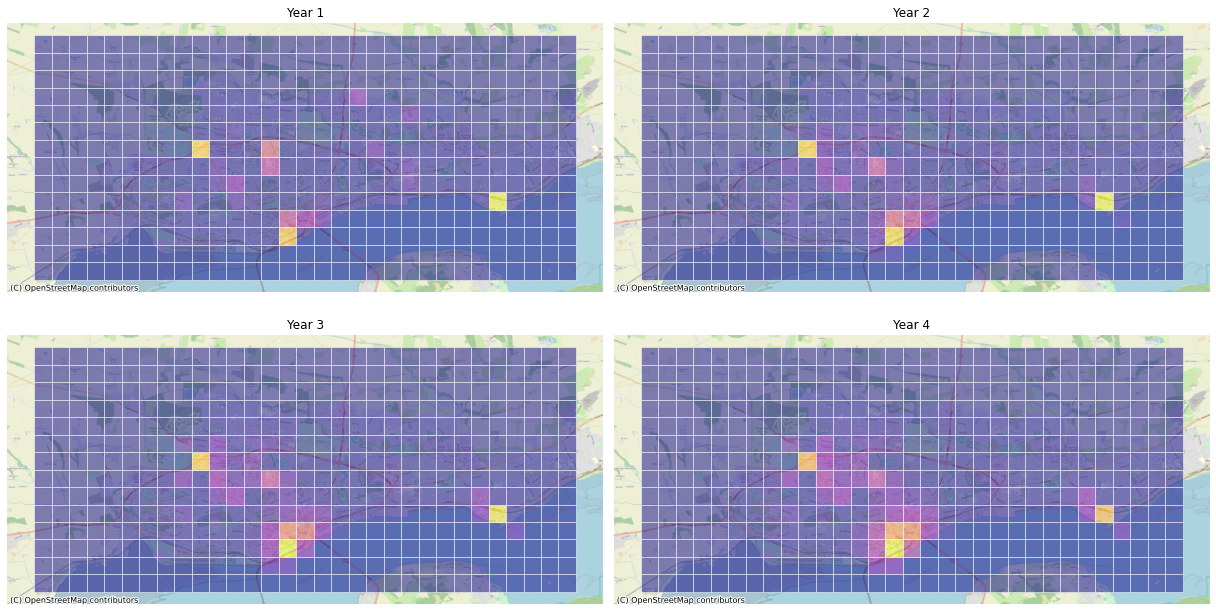

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(17,9))



#year 0
gdf.plot(ax=axs[0, 0], column='Demand_0', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[0, 0], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 1
gdf.plot(ax=axs[0, 1], column='Demand_1', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[0, 1], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 2
gdf.plot(ax=axs[1, 0], column='Demand_2', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[1, 0], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 3
gdf.plot(ax=axs[1, 1], column='Demand_3', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[1, 1], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')



# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')

axs[0, 0].set_title('Year 1')
axs[0, 1].set_title('Year 2')
axs[1, 0].set_title('Year 3')
axs[1, 1].set_title('Year 4')
 

#axs[1, 1].imshow(labels_reshaped)
fig.tight_layout()

